In [14]:
### 팀별 과제 ###

In [15]:
import pandas as pd
file_path ="./data ref/대구교통공사_역별일별시간별승하차인원현황_20250131.csv"
data = pd.read_csv(file_path,encoding="EUC-KR")
data.head(2)

,월,일,역번호,역명,승하차,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,일계
0,1,1,1150,설화명곡,승차,50,40,78,104,144,...,188,168,170,136,79,76,38,23,8,2339
1,1,1,1150,설화명곡,하차,2,99,48,74,69,...,170,160,211,193,131,133,112,88,85,2140


In [16]:
columns = ['month','day','num','name','type']
time_col = [f"{i}~{i+1}H" for i in range(5,24)]
# time_col = ['1h-2h','2h-3h']
columns =columns + time_col + ['total']
data.columns = columns
data = data.loc[:,:'total']

In [17]:
data.head(5)

,month,day,num,name,type,5~6H,6~7H,7~8H,8~9H,9~10H,...,15~16H,16~17H,17~18H,18~19H,19~20H,20~21H,21~22H,22~23H,23~24H,total
0,1,1,1150,설화명곡,승차,50,40,78,104,144,...,188,168,170,136,79,76,38,23,8,2339
1,1,1,1150,설화명곡,하차,2,99,48,74,69,...,170,160,211,193,131,133,112,88,85,2140
2,1,1,1160,화원,승차,26,42,47,103,152,...,308,271,195,105,89,38,42,30,7,2811
3,1,1,1160,화원,하차,5,71,46,83,141,...,292,251,155,154,121,120,85,77,74,2830
4,1,1,1170,대곡,승차,23,48,70,119,162,...,179,182,161,132,83,81,41,36,8,2426


In [18]:
data1 = data.groupby(['num','month','day','name']).sum().reset_index()
data1

,num,month,day,name,type,5~6H,6~7H,7~8H,8~9H,9~10H,...,15~16H,16~17H,17~18H,18~19H,19~20H,20~21H,21~22H,22~23H,23~24H,total
0,1150,1,1,설화명곡,승차하차,52,139,126,178,213,...,358,328,381,329,210,209,150,111,93,4479
1,1150,1,2,설화명곡,승차하차,71,238,651,757,501,...,570,650,754,845,396,275,238,190,95,8866
2,1150,1,3,설화명곡,승차하차,76,227,612,850,549,...,613,646,726,911,452,319,311,235,161,9399
3,1150,1,4,설화명곡,승차하차,62,170,264,401,449,...,521,605,557,495,306,298,279,210,138,7543
4,1150,1,5,설화명곡,승차하차,37,103,123,239,303,...,463,446,438,340,227,214,184,101,82,5407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2909,3410,1,27,용지,승차하차,21,98,136,193,261,...,279,307,261,231,99,73,83,78,48,3692
2910,3410,1,28,용지,승차하차,16,56,85,117,164,...,196,184,141,159,95,69,66,52,26,2395
2911,3410,1,29,용지,승차하차,13,40,35,92,83,...,152,143,107,127,70,76,55,36,32,1664
2912,3410,1,30,용지,승차하차,14,23,52,57,97,...,191,206,199,159,115,67,68,57,59,2259


In [19]:
gdata = data1[['name','month','day','total']]
gdata = gdata.sort_values(by=['name','day'],ascending=[True,False])
gdata.head(10)

,name,month,day,total
960,각산,1,31,8387
959,각산,1,30,4356
958,각산,1,29,2659
957,각산,1,28,3797
956,각산,1,27,5771
955,각산,1,26,5340
954,각산,1,25,6931
953,각산,1,24,9502
952,각산,1,23,8735
951,각산,1,22,8356


In [20]:
mdata = gdata.groupby(by="name").sum().reset_index()
tdata = mdata[['name','total']]
tdata

,name,total
0,각산,220315
1,감삼,355648
2,강창,287943
3,건들바위,90492
4,경대병원,360447
...,...,...
89,학정,18176
90,해안,135095
91,현충로,168520
92,화원,218548


In [21]:
sdata = tdata.sort_values(by='total', ascending=False)
sdata.head(20)
total_data = sdata[:20]
total_data

,name,total
38,반월당2,1237305
24,동대구역,1056787
76,중앙로,914031
37,반월당1,650779
45,상인,582605
17,대구역,456205
78,진천,443825
47,서부정류장,439476
41,범어,414089
4,경대병원,360447


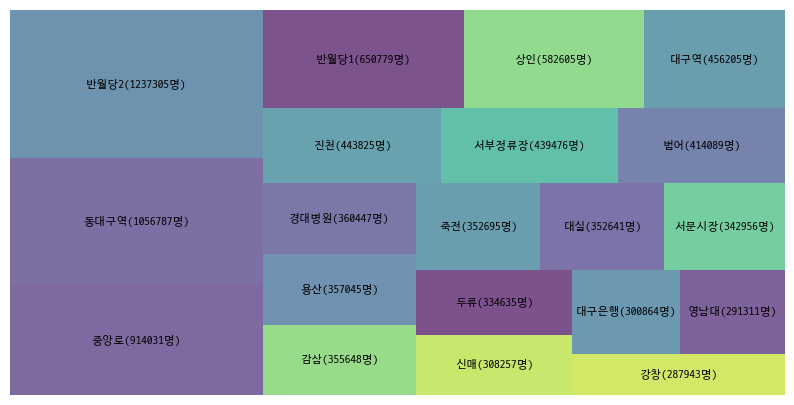

In [22]:
import squarify
plt.figure(figsize=(10,5))
squarify.plot(sizes=total_data['total'], label= [f"{x[0]}({x[1]}명)" for x in zip(total_data['name'],total_data['total'])], alpha = 0.7)
plt.rcParams['font.size']=7
plt.rcParams['text.color']='green'
plt.gca().invert_yaxis()
plt.axis("off")
plt.savefig("subway01.png")
plt.show()

- 위 차트를 보면 반월당 2역을 승하차 하는 인원이 제일 많으며, 그 다음은 동대구, 그 다음은 중앙로 인 것을 알 수 있다.
- 역 중 가장 적은 인원이 승하차 하는 역은 강창역이다.